# Solar
## Goal
* Explore power and what types effect they have

## Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import statistics

# acquire
from pydataset import data
import seaborn as sns

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import pydataset
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

np.random.seed(123)

# Acquire
* Data acquired from kaggle
* Import from Plant_1_Generation_Data
* Dataframe contained 68778 rows and 6 columns
* Each row represents a day for a powerplant
* Each column represents a feature of the powerplant
* Power Plant used is Plant 4135001

# Prepare
* Removed columns that did not contain useful information. Including Sorce Key and Plant ID
* Get a overview of the data

# Data Dictionary
| Feature | Definition |
|:--------|:-----------|
|DC_POWER| The amount of DC power generated|
|AC_POWER| The amount of AC power generated|
|DAILY_YIELD| The total of AC and DC power generated|
|TOTAL_YIELD| The total yield that the plant has generated over its entire life|

In [2]:
# Acquire data from kaggle
df = pd.read_csv('Plant_1_Generation_Data.csv', index_col=0)

In [3]:
# drop columns
df = df.drop(columns=['SOURCE_KEY', 'PLANT_ID'])

### A brief look at the data

In [4]:
df.head()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
DATE_TIME,,,,
15-05-2020 00:00,0.0,0.0,0.0,6259559.0
15-05-2020 00:00,0.0,0.0,0.0,6183645.0
15-05-2020 00:00,0.0,0.0,0.0,6987759.0
15-05-2020 00:00,0.0,0.0,0.0,7602960.0
15-05-2020 00:00,0.0,0.0,0.0,7158964.0


### Summary of the Data 

In [5]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,3147.426211,307.802752,3295.968737,6.978712e+06
std,4036.457169,394.396439,3145.178309,4.162720e+05
min,0.000000,0.000000,0.000000,6.183645e+06
25%,0.000000,0.000000,0.000000,6.512003e+06
50%,429.000000,41.493750,2658.714286,7.146685e+06
75%,6366.964286,623.618750,6274.000000,7.268706e+06
max,14471.125000,1410.950000,9163.000000,7.846821e+06


# Exploration

Text(-2.700000000000003, 0.5, 'AC Power')

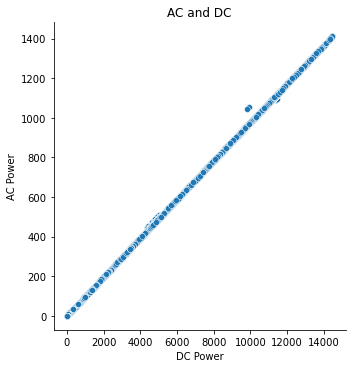

In [6]:
sns.relplot(x='DC_POWER', y='AC_POWER', data=df)
plt.title('AC and DC')
plt.xlabel('DC Power')
plt.ylabel('AC Power')

Text(-2.700000000000003, 0.5, 'Daily Yield')

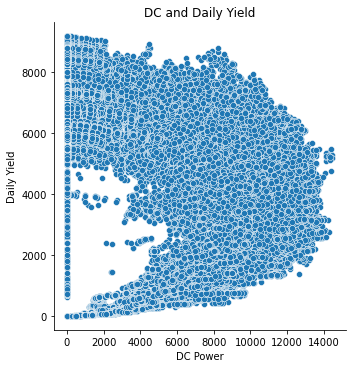

In [7]:
sns.relplot(x='DC_POWER', y='DAILY_YIELD', data=df)
plt.title('DC and Daily Yield')
plt.xlabel('DC Power')
plt.ylabel('Daily Yield')

Text(-2.700000000000003, 0.5, 'Daily Yield')

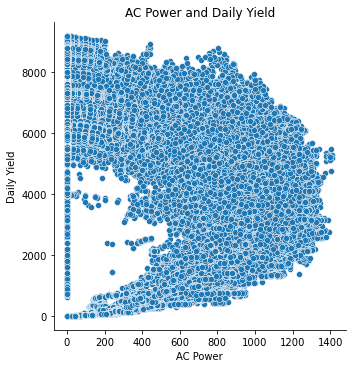

In [8]:
sns.relplot(x='AC_POWER', y='DAILY_YIELD', data=df)
plt.title('AC Power and Daily Yield')
plt.xlabel('AC Power')
plt.ylabel('Daily Yield')

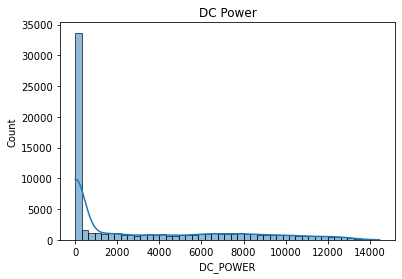

In [13]:
sns.histplot(df.DC_POWER, kde= True)
plt.title('DC Power')
plt.show()

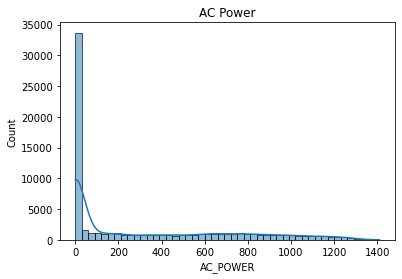

In [14]:
sns.histplot(df.AC_POWER, kde= True)
plt.title('AC Power')
plt.show()

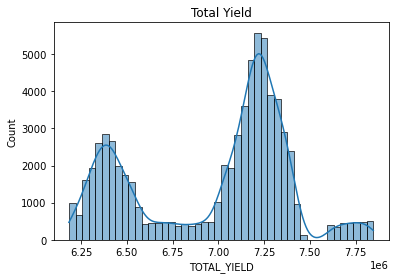

In [15]:
sns.histplot(df.TOTAL_YIELD, kde= True)
plt.title('Total Yield')
plt.show()

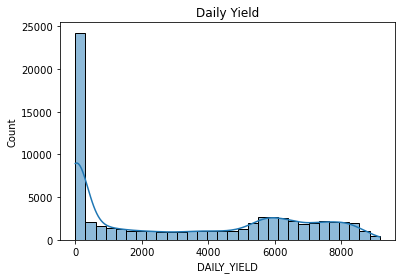

In [16]:
sns.histplot(df.DAILY_YIELD, kde= True)
plt.title('Daily Yield')
plt.show()

# Exploration Summary
* Total Yield peaks at 7.25 1e6
* Daily Yield is usually zero along with AC and DC power
* AC and DC power are directly related
* AC is not related to Total Power
* DC is not related to Total Power